In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
sidewalk = gpd.read_file('SeattleData/ProjectSidewalkLabelsMappedonSidewalk/ProjectSidewalkLabelsMappedonSidewalk.shp')

In [3]:
sidewalk.head()

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry
0,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47..."
1,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47..."
2,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.1,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47..."
3,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,72,None,None,SR1146066,2021-08-27,PARK,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.5,0,2017-06-30,None,2021-08-27,None,None,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47..."
4,6,328249,97,13246,SDW-30395,SDW,UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47..."


In [4]:
labels = gpd.read_file('SeattleData/ProjectSidewalkData/ProjectSidewalkData_Geolabels.shp')

In [5]:
#Spatial join project sidewalk labels to sidewalk geometry
labels_mapped_on_sidewalk = labels.sjoin_nearest(sidewalk)

In [6]:
labels_mapped_on_sidewalk.head()

,Attribute,Label Type,Street ID,OSM Street,Neighborho,latitude,longtitude,Severity,Temporary,Agree Coun,Disagree C,Not Sure C,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,0,0,0,1,POINT (-122.32030 47.64312),19267,27065,311888,97,14727,SDW-15994,SDW,E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2007-09-26,LSCP,53,None,72,None,None,SR1146066,2021-08-27,PARK,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.7,0,2017-07-12,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,169.539271
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,0,2,0,0,POINT (-122.32189 47.64326),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
35,57259744,NoSidewalk,12051,13521798,Portage Bay,47.643270,-122.321465,3.0,0,0,0,0,POINT (-122.32146 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
46714,57259940,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321280,3.0,0,1,1,0,POINT (-122.32128 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
70319,57259979,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321540,3.0,0,0,1,1,POINT (-122.32154 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568


In [7]:
problems = labels_mapped_on_sidewalk.loc[(labels_mapped_on_sidewalk['Label Type'] == 'NoCurbRamp') |(labels_mapped_on_sidewalk['Label Type'] == 'SurfaceProblem') |(labels_mapped_on_sidewalk['Label Type'] == 'Obstacle') |(labels_mapped_on_sidewalk['Label Type'] == 'Occlusion') ] 

In [8]:
problems

,Attribute,Label Type,Street ID,OSM Street,Neighborho,latitude,longtitude,Severity,Temporary,Agree Coun,Disagree C,Not Sure C,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng
46714,57259940,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321280,3.0,0,1,1,0,POINT (-122.32128 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
70319,57259979,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321540,3.0,0,0,1,1,POINT (-122.32154 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
70352,57260095,NoCurbRamp,23988,428224938,Portage Bay,47.643270,-122.320960,3.0,0,1,0,0,POINT (-122.32096 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
46752,57260091,NoCurbRamp,23959,428222729,Portage Bay,47.643147,-122.322120,3.0,0,2,0,0,POINT (-122.32212 47.64315),19271,27069,311892,97,14725,SDW-15998,SDW,E ROANOKE ST BETWEEN BOYLSTON AVE E AND HARVAR...,SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-07-18,NONE,INSVC,2010-07-31,NONE,0,None,94,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,DISTRICT4,N,None,3.0,2.0,0,2017-07-18,None,None,None,None,BLOCK,N,SSRP_NW3_SWShim,299.397841
70337,57260046,Obstacle,23959,428222729,Portage Bay,47.643110,-122.322200,2.0,0,2,1,0,POINT (-122.32220 47.64311),19271,27069,311892,97,14725,SDW-15998,SDW,E ROANOKE ST BETWEEN BOYLSTON AVE E AND HARVAR...,SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-07-18,NONE,INSVC,2010-07-31,NONE,0,None,94,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,DISTRICT4,N,None,3.0,2.0,0,2017-07-18,None,None,None,None,BLOCK,N,SSRP_NW3_SWShim,299.397841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93719,59103599,NoCurbRamp,8655,6488959,Greenwood,47.687004,-122.355130,3.0,0,0,0,1,POINT (-122.35513 47.68700),14302,21152,305985,97,15891,SDW-13462,SDW,N 80TH ST BETWEEN GREENWOOD AVE N AND DAYTON A...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-26,410C,INSVC,2007-09-26,LSCP,28,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT6,None,N,None,3.0,3.9,0,2017-07-26,None,None,None,None,BLOCK,N,SSRP_NW5_SWShim,638.909800
93720,59103616,NoCurbRamp,5368,6433374,Greenwood,47.684067,-122.347145,5.0,0,1,0,0,POINT (-122.34714 47.68407),13798,20528,305014,97,11421,SDW-37643,SDW,"LINDEN AVE N BETWEEN N 76TH ST AND N 77TH ST, ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-07-28,410C,INSVC,2010-07-31,LSCP,144,None,72,None,None,KARTHAP,2020-03-20,None

In [9]:
problems = problems.loc[problems['Disagree C'] == 0]

In [10]:
problems['Severity'].value_counts(dropna=False)

3.0    10278
4.0     4849
2.0     4718
5.0     4677
1.0     2762
NaN      870
Name: Severity, dtype: int64

In [11]:
problems = problems.dropna(subset=['Severity'])
problems = problems.rename(columns={'Severity': 'WeightedCount'})

In [12]:
problems

,Attribute,Label Type,Street ID,OSM Street,Neighborho,latitude,longtitude,WeightedCount,Temporary,Agree Coun,Disagree C,Not Sure C,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng
70352,57260095,NoCurbRamp,23988,428224938,Portage Bay,47.643270,-122.320960,3.0,0,1,0,0,POINT (-122.32096 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
46752,57260091,NoCurbRamp,23959,428222729,Portage Bay,47.643147,-122.322120,3.0,0,2,0,0,POINT (-122.32212 47.64315),19271,27069,311892,97,14725,SDW-15998,SDW,E ROANOKE ST BETWEEN BOYLSTON AVE E AND HARVAR...,SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-07-18,NONE,INSVC,2010-07-31,NONE,0,None,94,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,DISTRICT4,N,None,3.0,2.0,0,2017-07-18,None,None,None,None,BLOCK,N,SSRP_NW3_SWShim,299.397841
53,57259976,SurfaceProblem,6732,6456858,Portage Bay,47.651070,-122.320990,2.0,0,1,0,0,POINT (-122.32099 47.65107),11383,17710,302429,97,10578,SDW-13290,SDW,FUHRMAN AVE E BETWEEN FRANKLIN AVE E AND EASTL...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2010-07-31,PCC,138,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.1,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,295.848429
70318,57259978,SurfaceProblem,6732,6456858,Portage Bay,47.650830,-122.320786,2.0,0,1,0,1,POINT (-122.32079 47.65083),11383,17710,302429,97,10578,SDW-13290,SDW,FUHRMAN AVE E BETWEEN FRANKLIN AVE E AND EASTL...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2010-07-31,PCC,138,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.1,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,295.848429
33374,58854814,SurfaceProblem,6933,6459801,Eastlake,47.648853,-122.323210,2.0,0,1,0,0,POINT (-122.32321 47.64885),10295,16426,301495,97,10183,SDW-11116,SDW,EASTLAKE AVE E BETWEEN E ALLISON ST AND HARVAR...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410A,INSVC,2010-07-31,PCC,48,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SE,PCC,None,N,N,N,None,2022-06-17,DISTRICT4,DISTRICT3,N,None,3.0,2.1,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NW3_SWShim,667.297349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93719,59103599,NoCurbRamp,8655,6488959,Greenwood,47.687004,-122.355130,3.0,0,0,0,1,POINT (-122.35513 47.68700),14302,21152,305985,97,15891,SDW-13462,SDW,N 80TH ST BETWEEN GREENWOOD AVE N AND DAYTON A...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-26,410C,INSVC,2007-09-26,LSCP,28,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT6,None,N,None,3.0,3.9,0,2017-07-26,None,None,None,None,BLOCK,N,SSRP_NW5_SWShim,638.909800
93720,59103616,NoCurbRamp,5368,6433374,Greenwood,47.684067,-122.347145,5.0,0,1,0,0,POINT (-122.34714 47.68407),13798,20528,305014,97,11421,SDW-37643,SDW,"LINDEN AVE N BETWEEN N 76TH ST AND N 77TH ST, ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-07-28,410C,INSVC,2010-07-31,LSCP,144,None,72,None,None,KARTHAP,2020-03-20,None,E,P

In [13]:
problems_grouped = problems.groupby(by=["OBJECTID"]).sum()

In [14]:
problems_grouped

,Attribute,Street ID,OSM Street,latitude,longtitude,WeightedCount,Temporary,Agree Coun,Disagree C,Not Sure C,index_right,COMPKEY,COMPTYPE,SEGKEY,FILLERWID,SW_WIDTH,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,SHAPE_Leng
OBJECTID,,,,,,,,,,,,,,,,,,,,
6,58902095,2870,6386715,47.554268,-122.335236,4.0,0,2,0,0,4,328249,97,13246,0,0,2.0,0.0,0,518.804925
30,58902057,7677,6471321,47.557358,-122.335390,4.0,0,2,0,0,6,328251,97,13245,0,0,2.0,0.0,0,602.328847
32,176741399,42519,158520153,142.648871,-367.004220,14.0,0,7,0,0,24,984762,291,43209,0,216,9.0,6.6,57,1328.590571
34,235654990,93004,1712069208,190.202511,-489.341115,20.0,0,10,0,0,40,1313024,388,57608,0,0,16.0,0.0,0,1375.790980
36,117827361,15636,12947894,95.102660,-244.671295,10.0,0,3,0,0,22,656516,194,28802,0,0,8.0,0.0,0,502.836029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46219,58902489,5959,6443992,47.577610,-122.329890,3.0,0,3,0,0,27342,317619,97,4523,0,0,2.0,0.0,0,758.985794
46220,295227301,137243,3244381669,237.897947,-611.457155,21.0,2,15,0,0,136715,1586525,485,103260,520,360,5.0,12.0,0,1171.458273
46222,59081349,22553,397566988,47.583813,-122.314590,3.0,0,2,0,0,27345,318163,97,1930,65,72,3.0,2.4,0,249.967320


In [15]:
sidewalk_w_labels = sidewalk.merge(problems_grouped, how='outer', on='OBJECTID').fillna(0)

In [16]:
sidewalk_w_labels.head()

,OBJECTID,COMPKEY_x,COMPTYPE_x,SEGKEY_x,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID_x,INSTALL_DA,SW_WIDTH_x,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW_x,PRIMARYCRO_x,MINIMUMVAR_x,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng_x,geometry,Attribute,Street ID,OSM Street,latitude,longtitude,WeightedCount,Temporary,Agree Coun,Disagree C,Not Sure C,index_right,COMPKEY_y,COMPTYPE_y,SEGKEY_y,FILLERWID_y,SW_WIDTH_y,SRTS_SIDEW_y,PRIMARYCRO_y,MINIMUMVAR_y,SHAPE_Leng_y
0,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,0,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,0,96,0,0,SIDEWALK COLLECTOR,2018-02-07,0,SW,PCC,0,N,N,N,0,2022-06-17,DISTRICT3,0,N,0,3.0,0.4,0,2017-06-30,0,0,0,0,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,0,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,0,72,0,0,SIDEWALK COLLECTOR,2018-02-07,0,NE,PCC,0,N,N,N,0,2022-06-17,DISTRICT3,0,N,0,3.0,2.4,0,2017-06-30,0,0,0,0,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47...",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,0,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,0,96,0,0,SIDEWALK COLLECTOR,2018-02-07,0,SW,PCC,0,N,N,N,0,2022-06-17,DISTRICT3,0,N,0,3.0,2.1,0,2017-06-30,0,0,0,0,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47...",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,0,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,0,72,0,0,SR1146066,2021-08-27,PARK,NE,PCC,0,N,N,N,0,2022-06-17,DISTRICT3,0,N,0,3.0,1.5,0,2017-06-30,0,2021-08-27,0,0,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47...",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,6,328249,97,13246,SDW-30395,SDW,UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...,SW DATA LOAD,2007-09-26,0,0,0,NONE,INSVC,0,NONE,0,0,0,0,0,NGOC,2017-07-26,0,E,UIMPRV,0,N,N,N,0,2022-06-17,DISTRICT2,0,N,0,2.0,0.0,0,0,0,0,0,0,0,N,0,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47...",58902095.0,2870.0,6386715.0,47.554268,-122.335236,4.0,0.0,2.0,0.0,0.0,4.0,328249.0,97.0,13246.0,0.0,0.0,2.0,0.0,0.0,518.804925


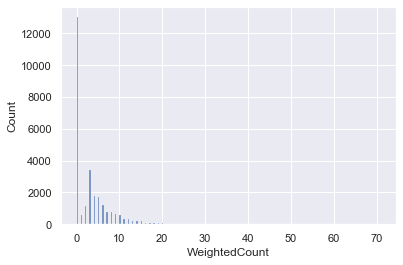

In [17]:
sns.histplot(data=sidewalk_w_labels, x="WeightedCount")

In [18]:
problems_per_street = sidewalk_w_labels[['OBJECTID','CONDITION','WeightedCount','SHAPE_Leng_x','geometry']]

In [19]:
problems_per_street

,OBJECTID,CONDITION,WeightedCount,SHAPE_Leng_x,geometry
0,2,FAIR,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47..."
1,3,GOOD,0.0,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47..."
2,4,GOOD,0.0,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47..."
3,5,EXCELLENT,0.0,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47..."
4,6,0,4.0,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47..."
...,...,...,...,...,...
27350,46240,FAIR,0.0,279.993952,"LINESTRING (-122.32156 47.60696, -122.32216 47..."
27351,46242,GOOD,0.0,379.150851,"LINESTRING (-122.33504 47.60822, -122.33585 47..."
27352,46243,GOOD,0.0,275.864735,"LINESTRING (-122.33767 47.60973, -122.33671 47..."
27353,46247,0,0.0,638.670086,"LINESTRING (-122.33370 47.69416, -122.33372 47..."


In [20]:
problems_per_street ['Problems_WeightedCount_per_feet'] = (problems_per_street ['WeightedCount']/problems_per_street ['SHAPE_Leng_x'])

In [21]:
problems_per_street

,OBJECTID,CONDITION,WeightedCount,SHAPE_Leng_x,geometry,Problems_WeightedCount_per_feet
0,2,FAIR,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.00000
1,3,GOOD,0.0,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47...",0.00000
2,4,GOOD,0.0,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47...",0.00000
3,5,EXCELLENT,0.0,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47...",0.00000
4,6,0,4.0,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47...",0.00771
...,...,...,...,...,...,...
27350,46240,FAIR,0.0,279.993952,"LINESTRING (-122.32156 47.60696, -122.32216 47...",0.00000
27351,46242,GOOD,0.0,379.150851,"LINESTRING (-122.33504 47.60822, -122.33585 47...",0.00000
27352,46243,GOOD,0.0,275.864735,"LINESTRING (-122.33767 47.60973, -122.33671 47...",0.00000
27353,46247,0,0.0,638.670086,"LINESTRING (-122.33370 47.69416, -122.33372 47...",0.00000


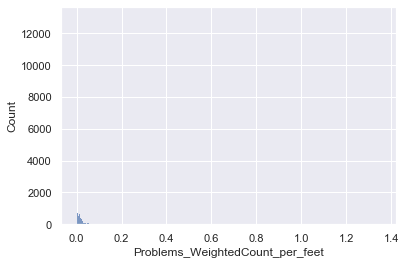

In [22]:
sns.histplot(data=problems_per_street, x="Problems_WeightedCount_per_feet")

In [28]:
problems_per_street.sort_values(by=['Problems_WeightedCount_per_feet'])

,OBJECTID,CONDITION,WeightedCount,SHAPE_Leng_x,geometry,Problems_WeightedCount_per_feet
0,2,FAIR,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.000000
15625,22706,FAIR,0.0,636.313331,"LINESTRING (-122.34460 47.70149, -122.34201 47...",0.000000
15628,22709,GOOD,0.0,300.899158,"LINESTRING (-122.34326 47.70318, -122.34203 47...",0.000000
15630,22711,FAIR,0.0,246.048828,"LINESTRING (-122.32307 47.68534, -122.32305 47...",0.000000
15631,22713,GOOD,0.0,63.445751,"LINESTRING (-122.32281 47.68511, -122.32282 47...",0.000000
...,...,...,...,...,...,...
6341,11119,GOOD,21.0,58.619193,"LINESTRING (-122.34202 47.66281, -122.34178 47...",0.358244
10780,16970,VERY-POOR,10.0,25.815056,"LINESTRING (-122.36579 47.62869, -122.36589 47...",0.387371
27017,45212,EXCELLENT,6.0,11.828993,"LINESTRING (-122.30045 47.63958, -122.30040 47...",0.507228
26993,45141,GOOD,10.0,15.642187,"LINESTRING (-122.34990 47.67250, -122.34984 47...",0.639297


In [29]:
weird2 = problems.loc[problems['OBJECTID'] == 3041]

In [106]:
#weird2.explore(tooltip ="Label Type")

In [31]:
weird1 = sidewalk.loc[sidewalk['OBJECTID'] == 3041]

In [105]:
#weird1.explore(tooltip="OBJECTID")

In [33]:
q = problems_per_street["Problems_WeightedCount_per_feet"].quantile(0.99)
df = problems_per_street[problems_per_street["Problems_WeightedCount_per_feet"] < q]

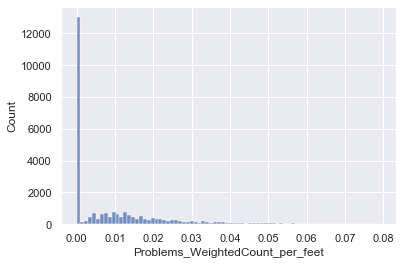

In [34]:
sns.histplot(data=df, x="Problems_WeightedCount_per_feet")

In [35]:
df

,OBJECTID,CONDITION,WeightedCount,SHAPE_Leng_x,geometry,Problems_WeightedCount_per_feet
0,2,FAIR,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.00000
1,3,GOOD,0.0,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47...",0.00000
2,4,GOOD,0.0,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47...",0.00000
3,5,EXCELLENT,0.0,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47...",0.00000
4,6,0,4.0,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47...",0.00771
...,...,...,...,...,...,...
27350,46240,FAIR,0.0,279.993952,"LINESTRING (-122.32156 47.60696, -122.32216 47...",0.00000
27351,46242,GOOD,0.0,379.150851,"LINESTRING (-122.33504 47.60822, -122.33585 47...",0.00000
27352,46243,GOOD,0.0,275.864735,"LINESTRING (-122.33767 47.60973, -122.33671 47...",0.00000
27353,46247,0,0.0,638.670086,"LINESTRING (-122.33370 47.69416, -122.33372 47...",0.00000


In [70]:
#df.explore(tiles="CartoDB dark_matter",column ="Problems_WeightedCount_per_feet", tooltip="Problems_WeightedCount_per_feet",cmap= "PiYG_r", scheme = 'FisherJenks', k=7,style_kwds =dict(opacity=0.3))

In [69]:
#s_condition.explore(tiles="CartoDB dark_matter",column ="CONDITION", tooltip="Problems_WeightedCount_per_feet",cmap= "PiYG_r", scheme="NaturalBreaks",style_kwds =dict(opacity=0.3))

In [43]:
s_condition = df.dropna(subset=["CONDITION"])
dict1 ={"EXCELLENT":"01_EXCELLENT", "GOOD":"02_GOOD", "FAIR": "03_FAIR", "POOR":"04_POOR", "VERY-POOR":"05_VERY-POOR"}
s_condition = s_condition.replace({"CONDITION": dict1})
s_condition= s_condition[s_condition['CONDITION'] != 0]

In [84]:
s_condition

,OBJECTID,CONDITION,WeightedCount,SHAPE_Leng_x,geometry,Problems_WeightedCount_per_feet
0,2,03_FAIR,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.000000
1,3,02_GOOD,0.0,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47...",0.000000
2,4,02_GOOD,0.0,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47...",0.000000
3,5,01_EXCELLENT,0.0,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47...",0.000000
8,32,05_VERY-POOR,14.0,442.863524,"LINESTRING (-122.33501 47.55011, -122.33440 47...",0.031612
...,...,...,...,...,...,...
27348,46225,02_GOOD,5.0,244.923864,"LINESTRING (-122.28634 47.55193, -122.28635 47...",0.020415
27349,46232,03_FAIR,0.0,513.140972,"LINESTRING (-122.26804 47.55477, -122.26596 47...",0.000000
27350,46240,03_FAIR,0.0,279.993952,"LINESTRING (-122.32156 47.60696, -122.32216 47...",0.000000
27351,46242,02_GOOD,0.0,379.150851,"LINESTRING (-122.33504 47.60822, -122.33585 47...",0.000000


In [94]:
dict2 ={"01_EXCELLENT":5, "02_GOOD":4, "03_FAIR": 3, "04_POOR": 2, "05_VERY-POOR": 1}
s_condition_n = s_condition.replace({"CONDITION": dict2})

In [95]:
s_condition_n

,OBJECTID,CONDITION,WeightedCount,SHAPE_Leng_x,geometry,Problems_WeightedCount_per_feet
0,2,3,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.000000
1,3,4,0.0,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47...",0.000000
2,4,4,0.0,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47...",0.000000
3,5,5,0.0,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47...",0.000000
8,32,1,14.0,442.863524,"LINESTRING (-122.33501 47.55011, -122.33440 47...",0.031612
...,...,...,...,...,...,...
27348,46225,4,5.0,244.923864,"LINESTRING (-122.28634 47.55193, -122.28635 47...",0.020415
27349,46232,3,0.0,513.140972,"LINESTRING (-122.26804 47.55477, -122.26596 47...",0.000000
27350,46240,3,0.0,279.993952,"LINESTRING (-122.32156 47.60696, -122.32216 47...",0.000000
27351,46242,4,0.0,379.150851,"LINESTRING (-122.33504 47.60822, -122.33585 47...",0.000000


In [71]:
#group to block data
bg = gpd.read_file('SeattleData/Census_Block_Groups_2010/Census_Block_Groups_2010.shp')
bg.head()

,OBJECTID,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area,geometry
0,1,000100,1,530330001001,Block Group 1,+47.7276870,-122.2815160,100,100.1,100.1,588.283002,221.041200,367.285577,NaN,21168.918543,2.562561e+07,"POLYGON ((-122.26840 47.72641, -122.26719 47.7..."
1,2,000100,2,530330001002,Block Group 2,+47.7293165,-122.2924690,100,100.2,100.2,71.258030,71.263215,0.000000,NaN,8692.089186,3.104000e+06,"POLYGON ((-122.28970 47.73193, -122.28965 47.7..."
2,3,000100,3,530330001003,Block Group 3,+47.7228093,-122.2894558,100,100.3,100.3,91.604629,91.611355,0.000000,NaN,8560.645769,3.990298e+06,"POLYGON ((-122.28633 47.72093, -122.28629 47.7..."
3,4,000100,4,530330001004,Block Group 4,+47.7319367,-122.2944531,100,100.4,100.4,31.237245,31.239309,0.000000,NaN,4693.439609,1.360694e+06,"POLYGON ((-122.29237 47.73194, -122.29231 47.7..."
4,5,000100,5,530330001005,Block Group 5,+47.7229283,-122.2944374,100,100.5,100.5,56.956546,56.960756,0.000000,NaN,7450.759251,2.481027e+06,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."


In [72]:
df.head()

,OBJECTID,CONDITION,WeightedCount,SHAPE_Leng_x,geometry,Problems_WeightedCount_per_feet
0,2,FAIR,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.00000
1,3,GOOD,0.0,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47...",0.00000
2,4,GOOD,0.0,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47...",0.00000
3,5,EXCELLENT,0.0,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47...",0.00000
4,6,0,4.0,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47...",0.00771


In [73]:
sidewalk_per_bg=df.sjoin(bg, op="within")

In [74]:
sidewalk_per_bg

,OBJECTID_left,CONDITION,WeightedCount,SHAPE_Leng_x,geometry,Problems_WeightedCount_per_feet,index_right,OBJECTID_right,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area
0,2,FAIR,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.000000,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06
1,3,GOOD,0.0,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47...",0.000000,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06
2,4,GOOD,0.0,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47...",0.000000,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06
3,5,EXCELLENT,0.0,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47...",0.000000,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06
183,528,GOOD,0.0,259.223269,"LINESTRING (-122.32249 47.60660, -122.32304 47...",0.000000,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25691,41271,GOOD,0.0,295.211522,"LINESTRING (-122.32854 47.60980, -122.32752 47...",0.000000,293,294,008300,1,530330083001,Block Group 1,+47.6098172,-122.3263480,8300,8300.1,8300.1,27.143585,27.144526,0.0,NaN,4363.182385,1.182375e+06
25692,41272,GOOD,1.0,295.382391,"LINESTRING (-122.32801 47.60921, -122.32699 47...",0.003385,293,294,008300,1,530330083001,Block Group 1,+47.6098172,-122.3263480,8300,8300.1,8300.1,27.143585,27.144526,0.0,NaN,4363.182385,1.182375e+06
25514,40606,POOR,0.0,303.650307,"LINESTRING (-122.37688 47.51922, -122.37810 47...",0.000000,472,473,011600,4,530330116004,Block Group 4,+47.5195300,-122.3838260,11600,11600.4,11600.4,143.275540,143.277136,0.0,NaN,12879.562535,6.241083e+06
25515,40607,GOOD,0.0,303.650635,"LINESTRING (-122.37688 47.51934, -122.37810 47...",0.000000,472,473,011600,4,530330116004,Block Group 4,+47.5195300,-122.3838260,11600,11600.4,11600.4,143.275540,143.277136,0.0,NaN,12879.562535,6.241083e+06


In [75]:
sidewalk_per_bg_grouped = sidewalk_per_bg.groupby(by=["GEOID10"]).sum()

In [76]:
sidewalk_per_bg_grouped

,OBJECTID_left,WeightedCount,SHAPE_Leng_x,Problems_WeightedCount_per_feet,index_right,OBJECTID_right,TRACT,TRBG,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area
GEOID10,,,,,,,,,,,,,,
530330004012,181583,0.0,3746.260838,0.000000,112,120,3208,3209.6,804.424076,804.480232,0.00000,0.0,74124.535544,3.504071e+07
530330004023,13072,0.0,305.668468,0.000000,18,19,402,402.3,79.738847,79.745107,0.00000,0.0,7895.828165,3.473424e+06
530330004024,89209,6.0,4078.977747,0.012810,171,180,3618,3621.6,899.451527,899.515973,0.00000,0.0,82928.393755,3.918011e+07
530330005002,6807,2.0,1272.567412,0.003143,42,44,1000,1000.4,199.900779,199.913690,0.00000,0.0,18638.620794,8.707678e+06
530330006001,1435,0.0,721.497231,0.000000,23,24,600,600.1,222.589518,222.605871,0.00000,0.0,14009.640956,9.695999e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530330111024,373531,39.0,5024.917393,0.148207,4587,4598,122122,122126.4,683.054065,683.065250,0.00000,0.0,98745.597893,2.975384e+07
530330112002,973,5.0,518.631145,0.019282,838,840,22400,22400.4,614.451205,511.749141,102.71199,0.0,47198.645146,2.676549e+07
530330114023,76953,0.0,620.717724,0.000000,862,864,22804,22804.6,213.500207,213.503003,0.00000,0.0,19422.546615,9.300069e+06


In [77]:
sidewalk_per_bg_grouped= sidewalk_per_bg_grouped[['WeightedCount','SHAPE_Leng_x']].reset_index().rename(columns={'SHAPE_Leng_x': 'SidewalkLeng'})

In [80]:
sidewalk_per_bg_grouped['Problems_WeightedCount_per_mile'] = (sidewalk_per_bg_grouped['WeightedCount']/sidewalk_per_bg_grouped['SidewalkLeng'])* 5280

In [81]:
sidewalk_per_bg_grouped

,GEOID10,WeightedCount,SidewalkLeng,Problems_WeightedCount_per_mile
0,530330004012,0.0,3746.260838,0.000000
1,530330004023,0.0,305.668468,0.000000
2,530330004024,6.0,4078.977747,7.766652
3,530330005002,2.0,1272.567412,8.298185
4,530330006001,0.0,721.497231,0.000000
...,...,...,...,...
359,530330111024,39.0,5024.917393,40.979778
360,530330112002,5.0,518.631145,50.903229
361,530330114023,0.0,620.717724,0.000000
362,530330116004,0.0,1213.835272,0.000000


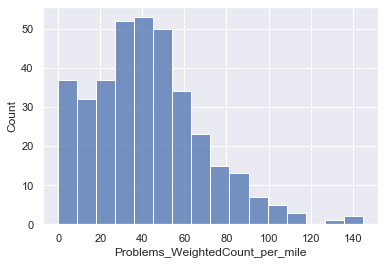

In [82]:
sns.histplot(data=sidewalk_per_bg_grouped, x="Problems_WeightedCount_per_mile")

In [83]:
sidewalk_per_bg_grouped.to_csv('SeattleData/SeattleNormalizedSidewalkLabelCounts_Problems_0719.csv',index=False)

In [96]:
condition_per_bg=s_condition_n.sjoin(bg, op="within")

In [97]:
condition_per_bg =condition_per_bg[['CONDITION','SHAPE_Leng_x','GEOID10']]

In [98]:
condition_per_bg ['score'] = condition_per_bg ['SHAPE_Leng_x']*condition_per_bg ['CONDITION']

In [99]:
condition_per_bg

,CONDITION,SHAPE_Leng_x,GEOID10,score
0,3,259.229841,530330085002,777.689523
1,4,259.229392,530330085002,1036.917567
2,4,178.386732,530330085002,713.546927
3,5,121.582237,530330085002,607.911187
183,4,259.223269,530330085002,1036.893076
...,...,...,...,...
25691,4,295.211522,530330083001,1180.846090
25692,4,295.382391,530330083001,1181.529564
25514,2,303.650307,530330116004,607.300615
25515,4,303.650635,530330116004,1214.602541


In [100]:
condition_per_bg_grouped = condition_per_bg.groupby(by=["GEOID10"]).sum()

In [101]:
condition_per_bg_grouped

,CONDITION,SHAPE_Leng_x,score
GEOID10,,,
530330004024,35,4078.977747,14687.815016
530330006004,13,1955.183724,6425.884757
530330011001,5,1201.134397,2963.243853
530330011002,15,2141.515570,7698.958951
530330012001,64,8358.404530,27446.066996
...,...,...,...
530330111024,27,3717.385246,11984.914652
530330112002,4,259.315573,1037.262291
530330114023,9,620.717724,2793.229594


In [104]:
condition_per_bg_grouped.to_csv('SeattleData/SeattleSidewalkConditions.csv',index=True)